# Tarea 3

#### Instrucciones:
- La tarea consta de una parte de preguntas y otra de desarrollo de código. Debe entregar todas las respuestas en formato notebook, y cuando la respuesta sea texto, debe hacer en celdas markdown con formato.
- La entrega de la Tarea es el día **5 de Noviembre, 23:59 hrs.**


## Nombre(s):
- Anahy Torres
- Alexander S.
- Esteban Aramayo

## Bosón de Higgs

En esta tarea trabajaremos con datos simulados del bosón de Higgs (versión simplificada), del desafío de [Kaggle](https://www.kaggle.com/c/higgs-boson/overview). Los archivos son Higgs_features.csv y Higgs_labels.csv. Las etiquetas son 0 (no hay señal de Higgs) y 1 (señal de Higgs). Los features son similares a los vistos en el set que utilizamos en clases, tales como energía faltantes, energía, momentum, rapidez transversal y azimutal, etc. Puede encontrar más detalles [acá](https://higgsml.lal.in2p3.fr/files/2014/04/documentation_v1.8.pdf). Note que el set de datos para esta tarea es una versión simplificada.

**1. Lea los datos en dos dataframes o arreglos de numpy, uno para features y otro para etiquetas**

In [ ]:
# Importamos los paquetes y librerias necesarios

import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
import sklearn.tree
import sklearn
from sklearn import neighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_validate
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import cross_val_predict, cross_val_score, cross_validate
from sklearn.model_selection import KFold, StratifiedKFold

from scipy import stats

from io import StringIO
from IPython.display import Image
import pydotplus
from sklearn.tree import export_graphviz

In [ ]:
# Cargamos los datos para las features y labels

Higs_ft=pd.read_csv('Higgs_features.csv',header=None)
Higs_lb=pd.read_csv('Higgs_labels.csv',header=None)
Higs = pd.concat([Higs_ft, Higs_lb], axis=1)

**2. ¿Cuántas instancias y características hay en el set de datos?**

In [ ]:
Higs.head()

0       1        2      3      4      5       6       7  0
0  393.335  79.460  308.879  4.095  1.403 -1.411  49.063  39.478  0
1   71.048  29.291   55.602  2.439  1.667 -1.412  22.926   9.486  0
2  141.450  87.017   72.091  1.472  4.714  1.233  23.591  69.754  0
3  156.539  39.797  127.933  4.017  1.279 -1.408  21.415  18.222  0
4   89.639  34.399   66.741  2.934  1.417 -1.377  26.459   8.257  0

In [ ]:
Higs.shape

(25000, 9)

Hay 8 features y 25000 instancias en el set de datos.

**3. Haga un gráfico de la distribución (histograma) de cada feature en el set de datos, en un sólo gráfico. Agregue una leyenda con las etiquetas (Feature 1, Feature 2....etc.) y fije la transparencia de los histogramas (parámetro alpha) en 0.5 para que se noten mejor.**

In [ ]:
# Nombramos a las columnas de las features

Higs_ft.columns = ['Feature 1','Feature 2','Feature 3','Feature 4','Feature 5','Feature 6','Feature 7','Feature 8']
Higs_ft.head()

Feature 1  Feature 2  Feature 3  Feature 4  Feature 5  Feature 6  \
0    393.335     79.460    308.879      4.095      1.403     -1.411   
1     71.048     29.291     55.602      2.439      1.667     -1.412   
2    141.450     87.017     72.091      1.472      4.714      1.233   
3    156.539     39.797    127.933      4.017      1.279     -1.408   
4     89.639     34.399     66.741      2.934      1.417     -1.377   

   Feature 7  Feature 8  
0     49.063     39.478  
1     22.926      9.486  
2     23.591     69.754  
3     21.415     18.222  
4     26.459      8.257

In [ ]:
# También le damos nombre a las etiquetas

Higs_lb.columns = ['Label']
Higs_lb.head()

Label
0      0
1      0
2      0
3      0
4      0

In [ ]:
# Dataframe con features y labels

Higs = pd.concat([Higs_ft, Higs_lb], axis=1)
Higs.head()

Feature 1  Feature 2  Feature 3  Feature 4  Feature 5  Feature 6  \
0    393.335     79.460    308.879      4.095      1.403     -1.411   
1     71.048     29.291     55.602      2.439      1.667     -1.412   
2    141.450     87.017     72.091      1.472      4.714      1.233   
3    156.539     39.797    127.933      4.017      1.279     -1.408   
4     89.639     34.399     66.741      2.934      1.417     -1.377   

   Feature 7  Feature 8  Label  
0     49.063     39.478      0  
1     22.926      9.486      0  
2     23.591     69.754      0  
3     21.415     18.222      0  
4     26.459      8.257      0

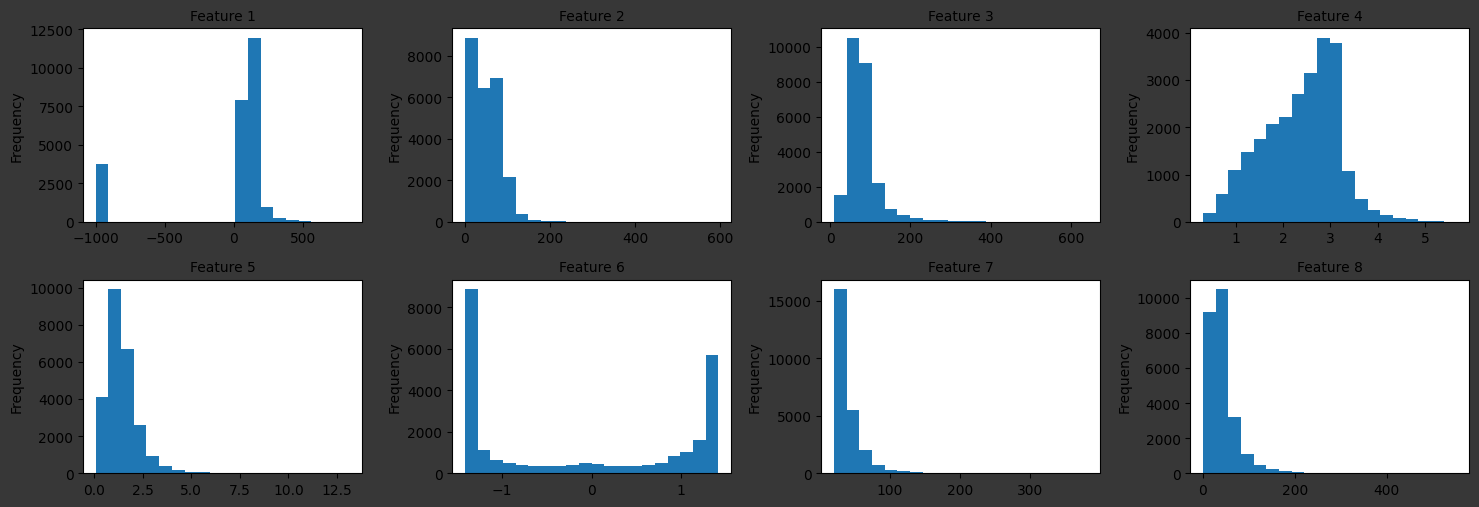

In [ ]:
# Creamos un plot de las distintas features para analizar por separado

figsize = (15,15)
sub_dim_x=6
sub_dim_y=4
fontsize=10

import matplotlib.pyplot as plt

# Creamos la figura
plt.figure(figsize=figsize, facecolor=(0,0,0,0.78))

for i, column in enumerate(Higs_ft.columns):
  ax = plt.subplot(sub_dim_x, sub_dim_y, i+1)
  ax.set_ylabel("", fontsize=fontsize)
  ax.set_title(column, fontsize=fontsize)
  plt.tight_layout(pad=1.08)
  # Ploteamos el histograma
  Higs_ft[column].plot(kind='hist', bins=20, ax=ax)

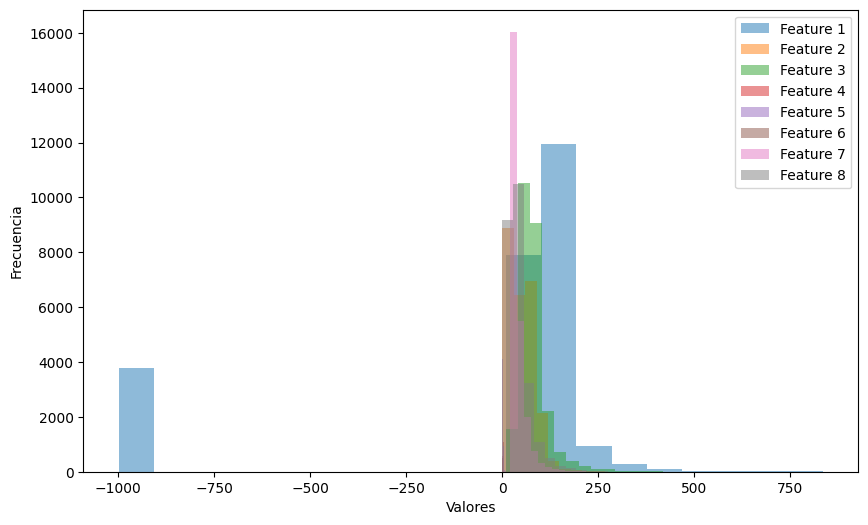

In [ ]:
# Ahora creamos el histograma para todas las features

plt.figure(figsize=(10, 6))
for i, column in enumerate(Higs_ft.columns):
    plt.hist(Higs_ft[column], bins=20, alpha=0.5, label=f'Feature {i+1}')

plt.xlabel('Valores')
plt.ylabel('Frecuencia')
plt.legend()
plt.show()

**4. Observa algo inusual en la distribución de alguna de las features? Qué puede causar este problema?**

Observamos que todas las características presentan valores positivos, excepto la Feature 1. Esto resulta peculiar, pero la respuesta a esto se puede encontrar en la documentación del dataset para el desafío de Kaggle sobre el Bosón de Higgs, donde se señala que se usó el valor -999.0 para denotar datos faltantes en casos donde ciertas variables no son aplicables o no pueden ser calculadas. Este valor, al estar fuera del rango habitual de las demás variables, indica información ausente o no significativa en el contexto de esas observaciones.

Este comportamiento inusual en los datos puede tener un impacto considerable en los análisis. En particular, el valor -999.0 puede distorsionar las distribuciones, haciendo que técnicas como la normalización, el cálculo de medias y desviaciones estándar, o la selección de características no reflejen adecuadamente la verdadera estructura de los datos. Además, los algoritmos de Machine Learning que no manejan bien los valores atípicos podrían interpretarlo como información válida, afectando la precisión y generalización del modelo. Es recomendable preprocesar estas entradas, para que las características se interpreten correctamente en el modelo.

**5\. ¿Cuántos eventos positivos (Higgs) tiene el data set? Cree que está balanceada la muestra?**

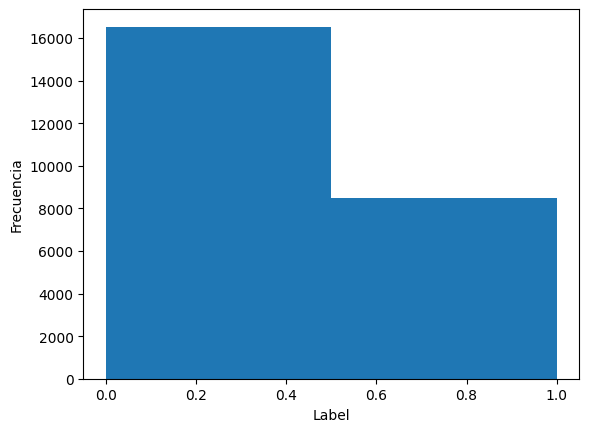

In [ ]:
plt.hist(Higs_lb['Label'], bins=2)
plt.xlabel('Label')
plt.ylabel('Frecuencia')
plt.show()

In [ ]:
higslb_array = Higs_lb['Label'].to_numpy().flatten()
np.bincount(higslb_array)

array([16526,  8474], dtype=int64)

In [ ]:
np.sum(Higs_lb)/len(Higs_lb)

C:\Users\assk2\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\numpy\core\fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


Label    0.33896
dtype: float64

Vemos que existe un desbalance entre las instancias positivas y negativas, alrededor del 34% de los datos son de instancias positivas, y el resto son negativas.

**6\. En base a su respuesta de la pregunta 5, qué métrica de evaluación (accuracy, precision o recall), escogería para este set de datos?**

Dado que el dataset está desbalanceado, la métrica de "accuracy" por sí sola no resulta confiable, ya que podría inflarse artificialmente al clasificar correctamente la mayoría de los casos de la clase mayoritaria (clase negativa) sin atender a la clase minoritaria (clase positiva). En estos escenarios, es crucial considerar tanto la "precision" como el "recall", ya que queremos evaluar no solo cuántas de las predicciones de la clase positiva son correctas, sino también cuántos de los casos positivos reales están siendo detectados.

El F1 Score, al incluir tanto a la "precision" como el "recall" en su fórmula, proporciona una medida balanceada que refleja la eficacia del modelo al capturar correctamente mucha más información que la "accuracy", especialmente en el caso de la clase minoritaria (positiva), que es a menudo la de mayor interés en problemas desbalanceados. Así, el F1 Score es más apto para este modelo con clases desbalanceadas.


**7\.  Use un clasificador de árbol de decisión y haga validación cruzada en sus datos, usando la métrica que escogió. Reporte el promedio y desviación estándar de los scores obtenidos de los cinco folds**

Recuerde usar StratifiedKFold, que incluya shuffle=True, para asegurar que los datos no estén en un orden específico



In [ ]:
Xtrain, Xtest, ytrain, ytest = train_test_split(Higs_ft, Higs_lb, random_state=2)

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.259237 to fit



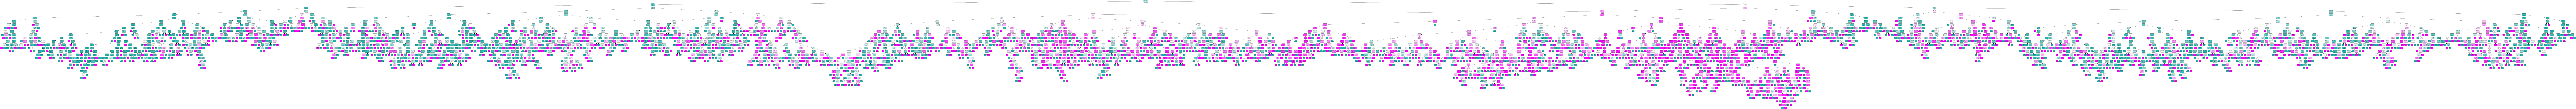

In [ ]:
# Construimos el modelo de árboles de desición
model = DecisionTreeClassifier(random_state=5)

model.fit(Xtrain, ytrain)

dot_data = StringIO()
export_graphviz(
            model,
            out_file =  dot_data,
            feature_names = ['Feature 1','Feature 2','Feature 3','Feature 4','Feature 5','Feature 6','Feature 7','Feature 8'], #Cambiar los nombres de feature
            class_names = ['0','1'],        #Cambiar los label
            filled = True,
rounded = True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue().replace("\n", ""))
nodes = graph.get_node_list()

for node in nodes:
    if node.get_label():
        values = [int(float(ii)) for ii in node.get_label().split('value = [')[1].split(']')[0].split(',')]
        values = [255 * v / sum(values) for v in values]

        values = [int(255 * v / sum(values)) for v in values]

        if values[0] > values[1]:
            alpha = int(values[0] - values[1])
            alpha = '{:02x}'.format(alpha) #turn into hexadecimal
            color = '#20 B2 AA'+str(alpha)
        else:
            alpha = int(values[1] - values[0])
            alpha = '{:02x}'.format(alpha)
            color = '#FF 00 FF'+str(alpha)
        node.set_fillcolor(color)

#graph.write_png('Graph.png',dpi = 300)

Image(graph.create_png())

In [ ]:
from sklearn.metrics import f1_score, make_scorer

# Implementamos el scoring f1

f1 = make_scorer(f1_score)
F1_scores = cross_validate(model, Higs_ft, Higs_lb, scoring = f1, cv=5)

In [ ]:
print("{:.3f}".format(F1_scores['test_score'].mean()), "{:.3f}".format(F1_scores['test_score'].std()))

0.634 0.008


**8\. Genere las etiquetas predichas usando cross_val_predict, y luego imprima la matriz de confusión**

In [ ]:
ypred = cross_val_predict(model,Higs_ft,Higs_lb,cv=5)

In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.figure(figsize=(7,6))
    print(cm)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center", verticalalignment="center",
                 color="green" if i == j else "red", fontsize = 30)

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[3338  730]
 [ 796 1386]]


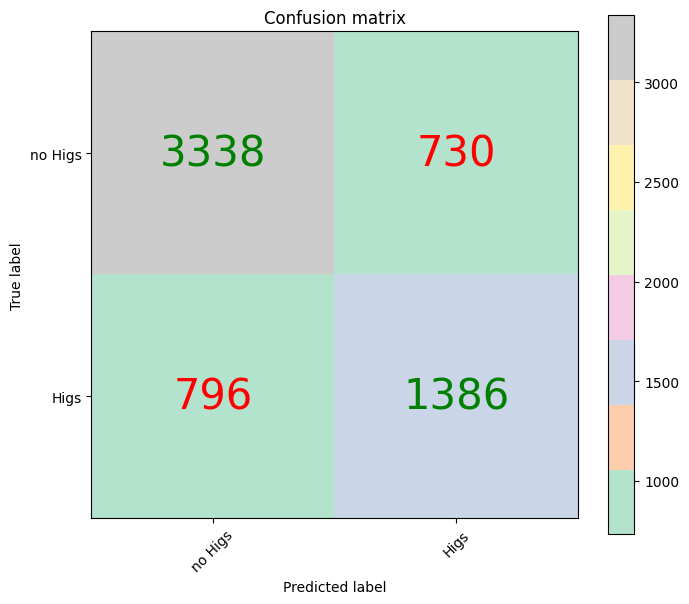

In [ ]:
cm = metrics.confusion_matrix(ytest,model.predict(Xtest))

plot_confusion_matrix(cm, ['no Higs','Higs'], cmap = plt.cm.Pastel2)

**9\. Dada la matriz de confusión, indique los valores de TP, TN, FP, FN. Tiene más errores de FP o FN?**

Hay 1371 TP, 796 FN, 730 FP Y 3345 TN.

La cantidad de errores de FP y FN son casi iguales, pero FN es ligeramente mayor

**10\. Ahora usemos un clasificador usando SVM. Usando SVC, deje los parámetros del clasificador los que viene por defecto y haga una validación cruzada con k=5 y reporte los scores, como hizo antes con el árbol de decisión. ¿Qué algoritmo tiene mejor performance?
Nota: SVMs es un algoritmo lento y puede tomar tiempo este cálculo. Si toma demasiado tiempo, reduzca el número de folds (no menos de 3).**

In [ ]:
from sklearn.svm import SVC, LinearSVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

piped_model = make_pipeline(StandardScaler(), SVC())

In [ ]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=101)

In [ ]:
benchmark_lim = cross_validate(piped_model, Higs_ft, Higs_lb, cv = cv, scoring = 'f1', return_train_score=True)

C:\Users\assk2\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\assk2\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\assk2\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the sha

In [ ]:
print("{:.3f}".format(benchmark_lim['test_score'].mean()), "{:.3f}".format(benchmark_lim['test_score'].std())) #puntaje promedio F1 test en SVM
print("{:.3f}".format(benchmark_lim['train_score'].mean()), "{:.3f}".format(benchmark_lim['train_score'].std())) #puntaje promedio F1 train en SVM

0.720 0.012
0.725 0.002


**11\. Reporte la matriz de confusión para el algoritmo de SVC. Hay algún cambio de los valores de FP y FN respecto al modelo de árbol de decisión?**

In [ ]:
ypred_bench_lim = cross_val_predict(piped_model,Higs_ft, Higs_lb, cv = cv)

C:\Users\assk2\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\assk2\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\assk2\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the sha

C:\Users\assk2\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Confusion matrix, without normalization
[[3610  458]
 [ 634 1548]]


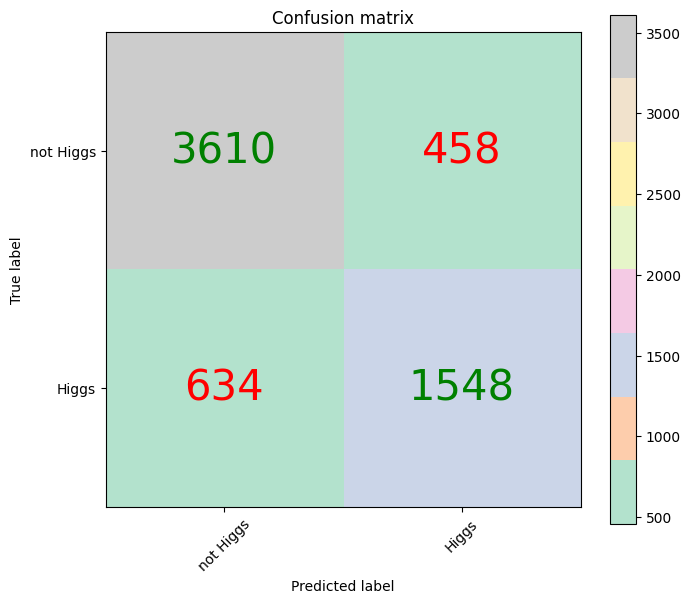

In [ ]:
piped_model.fit(Higs_ft, Higs_lb)
cm2 = metrics.confusion_matrix(ytest,piped_model.predict(Xtest))

plot_confusion_matrix(cm2, ['not Higgs','Higgs'], cmap = plt.cm.Pastel2)

Pos si que hay cambio. Antes, usando Decision ]Tree (DT), teniamos una cantidad casi igual de FP y FN. Ahora, usando Support Vector Machine (SVM), hay 41.9% de FP, es decir, que ahora hay más FN que FP. Lo unico que no cambia demasiado es la cantidad de TP y TN.

**12\. Intente optimizar los parámetros de SVC. Para evitar que tome demasiado tiempo, seleccione solo el primer 5% de los datos (asegúrese de desordenarlos antes)**


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.utils import shuffle

In [ ]:
Higs_shuff = shuffle(Higs, random_state=42)
Higs_shuff = Higs_shuff.reset_index(drop=True)
Higs_shuff.head()                               #Se revuelven los datos

Feature 1  Feature 2  Feature 3  Feature 4  Feature 5  Feature 6  \
0     71.756      7.030     47.987      2.288      1.315      0.453   
1   -999.000    179.329     92.856      1.811      3.158     -1.395   
2    109.198      8.987     71.063      3.046      0.624      1.408   
3     43.975     90.325     40.714      1.128      1.775     -1.102   
4   -999.000     89.040     87.207      2.689      1.189     -1.007   

   Feature 7  Feature 8  Label  
0     22.720     20.985      0  
1     27.189    101.877      1  
2     44.962     14.851      1  
3     27.803     41.413      0  
4     23.755     70.171      0

In [ ]:
Higs_sampled = Higs_shuff.sample(frac=0.05,random_state=42) #Tomar un 5% random de los datos shuffled
Higs_sampled = Higs_shuff[:1250]                            #Primer 5% de los datos shuffled
Higs_sampled.reset_index(inplace=True, drop=True)
Higs_sampled.shape                                  #Se toma la primera fraccion de 5% de los datos

(1250, 9)

In [ ]:
Higs_sample_ft = Higs_sampled[Higs_sampled.columns[:-1]]
Higs_sample_lb = Higs_sampled[Higs_sampled.columns[8]]
Higs_sample_ft.shape                                    #Se dividen los datos en labels y features

(1250, 8)

In [ ]:
Higs_sample_ft.head()       #Comprobar que fue dividido bien

Feature 1  Feature 2  Feature 3  Feature 4  Feature 5  Feature 6  \
0     71.756      7.030     47.987      2.288      1.315      0.453   
1   -999.000    179.329     92.856      1.811      3.158     -1.395   
2    109.198      8.987     71.063      3.046      0.624      1.408   
3     43.975     90.325     40.714      1.128      1.775     -1.102   
4   -999.000     89.040     87.207      2.689      1.189     -1.007   

   Feature 7  Feature 8  
0     22.720     20.985  
1     27.189    101.877  
2     44.962     14.851  
3     27.803     41.413  
4     23.755     70.171

In [ ]:
Higs_sample_lb.head()   #Comprobar

0    0
1    1
2    1
3    0
4    0
Name: Label, dtype: int64

In [ ]:
%%time
#optimizando SVC, TODAVIA NO ES CV ANIDADA!

#Probamos kernel polinomial y gaussiano, parámetros gamma y degree,
# además del parámetro de regularización
parameters = {'svc__kernel':['poly', 'rbf'], \
              'svc__gamma':[0.00001,'scale', 0.01, 0.1], 'svc__C':[0.1, 1.0, 10.0, 100.0, 1000], \
              'svc__degree': [2, 4, 8]}

# CV para todos los valores de los parámetros del GridSearch
model = GridSearchCV(piped_model, parameters,scoring='f1', cv = StratifiedKFold(n_splits=5, shuffle=True), \
                     verbose = 2, n_jobs = 4, return_train_score=True)
model.fit(Higs_sample_ft,Higs_sample_lb)


print('Best params, best score:', "{:.4f}".format(model.best_score_), \
      model.best_params_)


Fitting 5 folds for each of 120 candidates, totalling 600 fits
Best params, best score: 0.6938 {'svc__C': 1000, 'svc__degree': 2, 'svc__gamma': 0.01, 'svc__kernel': 'rbf'}
CPU times: total: 1.66 s
Wall time: 35.3 s


Sin hacer ajuste de parametros, se obtiene un F1 score de 0.72 para el test y con ajuste de parametros se obtiene 0.6938 de F1 score para el test. No cambia mucho pero empeoró el F1 score.

**13\. Haga un esquema de CV con GridSearch, con los siguientes valores de parámetros:
parameters = {'kernel':['linear','rbf'],'C':[1, 10, 100], 'gamma':[0.01, 0.1, 0.5], 'class_weight':[{1:1},{1:3},{1:5}]}**

**Recuerde seguir usando la métrica que eligió más arriba.**

**Esto tomará tiempo! Fije verbose=2 en GridSearch para monitorear el progreso, y njobs=4 o más para acelerar un poco el proceso.**

**Reporte los parámetros y scores del mejor modelo**

In [ ]:
%%time

parameters = {
    'svc__kernel':['linear','rbf'],
    'svc__C':[1, 10, 100],
    'svc__gamma':[0.01, 0.1, 0.5],
    'svc__class_weight':[{1:1},{1:3},{1:5}]}

# CV para todos los valores de los parámetros del GridSearch
model = GridSearchCV(piped_model, parameters,scoring='f1', cv = StratifiedKFold(n_splits=5, shuffle=True), \
                     verbose = 2, n_jobs = 4, return_train_score=True)
model.fit(Higs_sample_ft,Higs_sample_lb)

print('Best params, best score:', "{:.4f}".format(model.best_score_), \
      model.best_params_)

Fitting 5 folds for each of 54 candidates, totalling 270 fits
Best params, best score: 0.7133 {'svc__C': 10, 'svc__class_weight': {1: 3}, 'svc__gamma': 0.1, 'svc__kernel': 'rbf'}
CPU times: total: 656 ms
Wall time: 26.5 s


**14\. En base a sus resultados, cuál algoritmo de clasificación recomendaría para este problema, árbol de decisión o SVC?**

Viendo que el algoritmo de DT reporta un valor de 0.63 para F1 score y el de SVC reporta uno de 0.7133, objetivamente el SVC es el mejor algoritmo, ya que mitiga bastante el desbalance de datos. Sin embargo, debido al desbalance en los datos ambos algoritmos siguen siendo bastante malos para clasificar.